## 손실 곡선

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [3]:
model = model_fn()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
train_target[0]

7

* [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] -> categorical_crossentropy
* 7 -> sparce_categorical_crossentropy

In [5]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5309 - accuracy: 0.8142
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3886 - accuracy: 0.8614
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3524 - accuracy: 0.8742
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3331 - accuracy: 0.8813
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3174 - accuracy: 0.8885
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3075 - accuracy: 0.8917
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2982 - accuracy: 0.8953
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2891 - accuracy: 0.8989
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2829 - accuracy: 0.9014
Epoch 10/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.276

* history 변수 : 훈련 측정값이 딕셔너리 형태로 저장되어 있음
* 케라스는 기본적으로 에포크마다 손실을 계산
    * 정확도 : compile() 메서드에서 metrics 매개변수에 'accuracy'를 추가했기 때문에 history 속성에 포함 

In [6]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

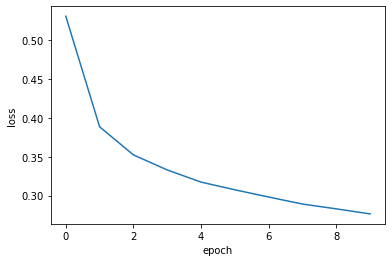

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('epoch-loss', dpi=300)
plt.show()

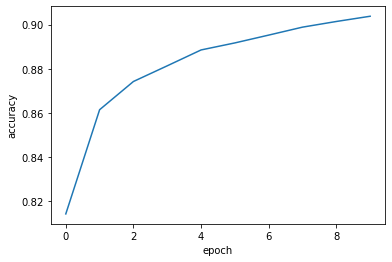

In [8]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('epoch-accuracy', dpi=300)
plt.show()

* epoch=20

In [9]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

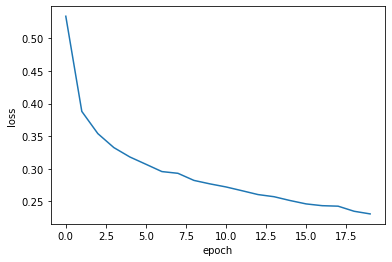

In [10]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('epoch_20-loss', dpi=300)
plt.show()

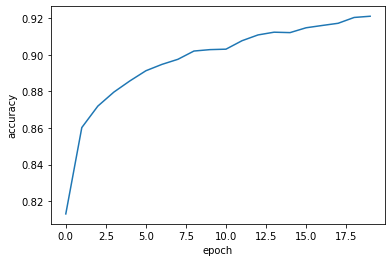

In [11]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('epoch_20-accuracy', dpi=300)
plt.show()

---

## 검증 손실
* 에포크에 따른 과대적합과 과소적합을 파악하려면, 훈련 세트에 대한 점수뿐만 아니라 검증 세트에 대한 점수도 필요 
* 따라서 앞에서처럼 훈련 세트의 손실만 그려서는 안된다

* 모델이 최적화하는 대상은 정확도가 아니라 **손실 함수** 
    * 이따금 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있음
* 따라서 모델이 잘 훈련되었는지 판단하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 좋음

In [12]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, 
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5221 - accuracy: 0.8184 - val_loss: 0.4844 - val_accuracy: 0.8189
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3881 - accuracy: 0.8608 - val_loss: 0.3889 - val_accuracy: 0.8633
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3525 - accuracy: 0.8722 - val_loss: 0.4377 - val_accuracy: 0.8526
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3313 - accuracy: 0.8796 - val_loss: 0.3672 - val_accuracy: 0.8713
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3165 - accuracy: 0.8887 - val_loss: 0.3587 - val_accuracy: 0.8750
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3049 - accuracy: 0.8915 - val_loss: 0.3606 - val_accuracy: 0.8759
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2965 - accuracy: 0.8954 - val_loss: 0.3698 - val_accuracy:

In [13]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


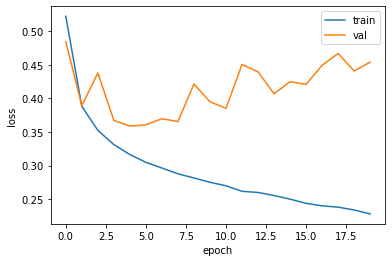

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('epoch_20-loss(val_loss)', dpi=300)
plt.show()

* 5번째 에포크 만에 검증 손실이 상승하기 시작..
* 훈련 손실은 꾸준히 감소하기 때문에 전형적인 과대적합 모델이 만들어진다 
* 검증 손실이 상승하는 시점을 가능한 뒤로 늦추기
    * 검증 세트에 대한 손실이 줄어들 뿐만 아니라, 검증 세트에 대한 정확도도 증가할 것

* 옵티마이저 하이퍼파라미터를 조정하여 과대적합을 완화시킬 수 있는지 확인해보자
    * 기본 RMSprop 옵티마이저 : 많은 문제에서 잘 동작한다
    * 만약, 이 옵티마이저 대신 다른 옵티마이저를 테스트해 본다면 **Adam** 추천
* Adam : 적응적 학습률을 사용
    * 에포크가 진행되면서 학습률의 크기 조정 가능

##### Adam

In [15]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, 
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5181 - accuracy: 0.8183 - val_loss: 0.4790 - val_accuracy: 0.8262
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3920 - accuracy: 0.8596 - val_loss: 0.3720 - val_accuracy: 0.8659
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3519 - accuracy: 0.8725 - val_loss: 0.4091 - val_accuracy: 0.8447
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3274 - accuracy: 0.8792 - val_loss: 0.3551 - val_accuracy: 0.8704
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3076 - accuracy: 0.8877 - val_loss: 0.3338 - val_accuracy: 0.8839
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2901 - accuracy: 0.8926 - val_loss: 0.3309 - val_accuracy: 0.8788
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2778 - accuracy: 0.8989 - val_loss: 0.3289 - val_accuracy:

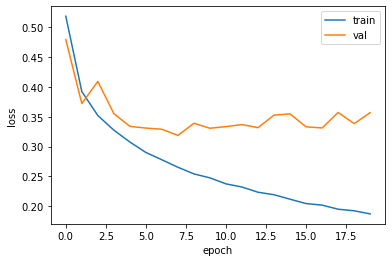

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
# plt.savefig('7_3-05', dpi=300)

plt.show()

##### RMSprop

In [17]:
model = model_fn()
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, 
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5365 - accuracy: 0.8116 - val_loss: 0.4352 - val_accuracy: 0.8487
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3951 - accuracy: 0.8583 - val_loss: 0.3814 - val_accuracy: 0.8634
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3573 - accuracy: 0.8722 - val_loss: 0.4044 - val_accuracy: 0.8611
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3364 - accuracy: 0.8793 - val_loss: 0.3823 - val_accuracy: 0.8705
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3208 - accuracy: 0.8842 - val_loss: 0.3589 - val_accuracy: 0.8789
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3093 - accuracy: 0.8899 - val_loss: 0.3946 - val_accuracy: 0.8723
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3003 - accuracy: 0.8944 - val_loss: 0.3723 - val_accuracy:

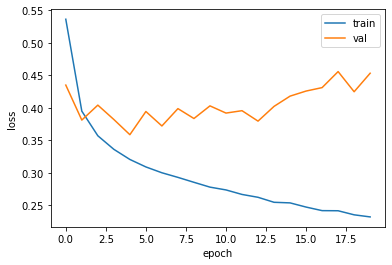

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
# plt.savefig('7_3-05', dpi=300)

plt.show()

---

## 드롭아웃
* 드롭아웃은 인공지능의 3대 거장 제프리 힌튼이 소개
* 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(뉴런의 출력을 0으로 만들어) 과대적합을 막는다

* 이전 층의 일부 뉴런이 랜덤하게 꺼지면, 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 한다
* 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면, 이 신경망은 더 안정적인 예측을 만들 수 있을 것이다

In [19]:
# rate=0.3 : 0.7(70%)에 해당하는 노드들만 남겨두고 다 지워버리는 것
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, 
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5912 - accuracy: 0.7920 - val_loss: 0.4311 - val_accuracy: 0.8457
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4419 - accuracy: 0.8407 - val_loss: 0.3893 - val_accuracy: 0.8587
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4067 - accuracy: 0.8527 - val_loss: 0.3687 - val_accuracy: 0.8678
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3828 - accuracy: 0.8600 - val_loss: 0.3701 - val_accuracy: 0.8655
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3679 - accuracy: 0.8661 - val_loss: 0.3635 - val_accuracy: 0.8693
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3580 - accuracy: 0.8692 - val_loss: 0.3377 - val_accuracy: 0.8781
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3458 - accuracy: 0.8726 - val_loss: 0.3324 - val_accuracy:

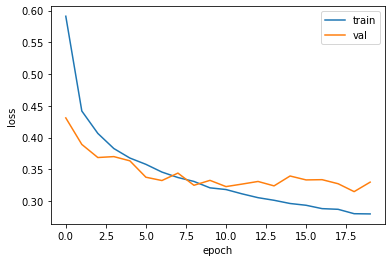

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
# plt.savefig('7_3-05', dpi=300)

plt.show()

---

## 모델 저장과 복원

In [22]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=1, 
                    validation_data=(val_scaled, val_target))

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5897 - accuracy: 0.7895 - val_loss: 0.4441 - val_accuracy: 0.8351
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4427 - accuracy: 0.8412 - val_loss: 0.3957 - val_accuracy: 0.8524
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4069 - accuracy: 0.8520 - val_loss: 0.3671 - val_accuracy: 0.8660
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3863 - accuracy: 0.8605 - val_loss: 0.3594 - val_accuracy: 0.8668
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3673 - accuracy: 0.8658 - val_loss: 0.3544 - val_accuracy: 0.8714
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3575 - accuracy: 0.8692 - val_loss: 0.3449 - val_accuracy: 0.8748
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3449 - accuracy: 0.8722 - val_loss: 0.3558 - val_accuracy:

In [23]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.weights

[<tf.Variable 'dense_12/kernel:0' shape=(784, 100) dtype=float32, numpy=
 array([[-0.17507866, -0.06548321,  0.01027568, ..., -0.05089957,
          0.14770848, -0.24121247],
        [ 0.16268638,  0.03085833, -0.18049978, ...,  0.28757873,
          0.33682755, -0.07272613],
        [ 0.11980955,  0.05146995, -0.03522272, ..., -0.11527837,
          0.24584322,  0.0774897 ],
        ...,
        [ 0.11740404, -0.02669111, -0.14031811, ...,  0.07288112,
         -0.0057454 ,  0.00932602],
        [-0.01220272, -0.00837676, -0.21880797, ..., -0.03263787,
          0.43482366, -0.2287037 ],
        [-0.10453478,  0.01128627, -0.16020152, ...,  0.01708207,
          0.21277633, -0.32343975]], dtype=float32)>,
 <tf.Variable 'dense_12/bias:0' shape=(100,) dtype=float32, numpy=
 array([ 0.07106474, -0.01864074, -0.09386887,  0.32875767,  0.19478117,
         0.06138681, -0.01409778, -0.06749169,  0.46668708, -0.01577993,
         0.33602118, -0.012518  , -0.28428155,  0.30928722,  0.25416043

### save_weights()

* 케라스 모델은 훈련된 모델의 파라미터를 저장하는 간편한 save_weights() 메서드를 제공
* 텐서플로의 체크포인트 포맷으로 저장하지만, 파일의 확장자가 h5일 경우 HDF5 포맷으로 저장

In [25]:
model.save_weights('model-weights.h5')

### save()

* 모델 구조와 모델 파라미터를 함께 저장하는 save() 메서드 제공
* 텐서플로의 SavedModel 포맷으로 저장하지만, 파일의 확장자가 h5일 경우 HDF5 포맷으로 저장

In [26]:
model.save('model-whole.h5')

### load_weights()

* load_weights() 메서드를 사용하려면 save_weights() 메서드로 저장했던 모델과 정확히 같은 구조를 가져야 한다
* 그렇지 않으면 에러 발생
    *  여기에서는 model_fn() 함수를 사용해 동일한 모델을 만들어 사용

In [27]:
model_2 = model_fn(keras.layers.Dropout(0.3))

In [28]:
model_2.load_weights('model-weights.h5')

In [29]:
model_2.weights

[<tf.Variable 'dense_14/kernel:0' shape=(784, 100) dtype=float32, numpy=
 array([[-0.17507866, -0.06548321,  0.01027568, ..., -0.05089957,
          0.14770848, -0.24121247],
        [ 0.16268638,  0.03085833, -0.18049978, ...,  0.28757873,
          0.33682755, -0.07272613],
        [ 0.11980955,  0.05146995, -0.03522272, ..., -0.11527837,
          0.24584322,  0.0774897 ],
        ...,
        [ 0.11740404, -0.02669111, -0.14031811, ...,  0.07288112,
         -0.0057454 ,  0.00932602],
        [-0.01220272, -0.00837676, -0.21880797, ..., -0.03263787,
          0.43482366, -0.2287037 ],
        [-0.10453478,  0.01128627, -0.16020152, ...,  0.01708207,
          0.21277633, -0.32343975]], dtype=float32)>,
 <tf.Variable 'dense_14/bias:0' shape=(100,) dtype=float32, numpy=
 array([ 0.07106474, -0.01864074, -0.09386887,  0.32875767,  0.19478117,
         0.06138681, -0.01409778, -0.06749169,  0.46668708, -0.01577993,
         0.33602118, -0.012518  , -0.28428155,  0.30928722,  0.25416043

### load_model()

In [30]:
model_whole = keras.models.load_model('model-whole.h5')

In [31]:
model_whole.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3259 - accuracy: 0.8802


[0.3259182274341583, 0.8802499771118164]

In [32]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3259 - accuracy: 0.8802


[0.3259182274341583, 0.8802499771118164]

### 콜백

* 콜백함수 : 어떤 이벤트에 의해 호출되어지는 함수를 의미
    * 케라스에서는 훈련 과정 중간에 어떤 작업을 수행할 때 사용
* keras.callbacks 패키지 아래에 있는 클래스
* fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용
* ModelCheckpoint 콜백은 기본적으로 최상의 검증 점수를 만드는 모델을 저장
    * 저장될 파일 이름은 best-model.h5로 지정하여 콜백을 적용 

In [33]:
model_callback = model_fn(keras.layers.Dropout(0.3))
model_callback.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')

model_callback.fit(train_scaled, train_target, epochs=20, verbose=1, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5911 - accuracy: 0.7933 - val_loss: 0.4278 - val_accuracy: 0.8464
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4393 - accuracy: 0.8422 - val_loss: 0.3786 - val_accuracy: 0.8641
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4047 - accuracy: 0.8541 - val_loss: 0.3663 - val_accuracy: 0.8644
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3792 - accuracy: 0.8604 - val_loss: 0.3524 - val_accuracy: 0.8690
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3678 - accuracy: 0.8651 - val_loss: 0.3469 - val_accuracy: 0.8709
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3507 - accuracy: 0.8712 - val_loss: 0.3465 - val_accuracy: 0.8748
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3462 - accuracy: 0.8721 - val_loss: 0.3518 - val_accuracy:

In [34]:
model_callback.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3218 - accuracy: 0.8868


[0.3217734396457672, 0.8868333101272583]

In [35]:
tmp = keras.models.load_model('best-model.h5')
tmp.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3218 - accuracy: 0.8868


[0.3217734396457672, 0.8868333101272583]

---

### 조기 종료(ealry stopping)

* 에포크의 횟수 만큼 훈련을 진행하다보면 과적합이 발생하기 때문에 어느 시점 이상은 훈련을 계속할 필요성이 없어짐
    * 이때 훈련을 중지하면 컴퓨터 자원과 시간을 절약할 수 있다

* 이렇게 과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 조기 종료(ealry stopping)라고 한다 
* 훈련 에포크 횟수를 제한하는 역할이지만, 모델이 과대적합되는 것을 막아주기 때문에 규제 방법 중 하나로 생각할 수도 있다

* 케라스에서는 EarlyStopping 콜백 함수를 제공 
* patience = 2 : 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지
* restore_best_weights = True : 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다

In [36]:
model_final = model_fn(keras.layers.Dropout(0.3))
model_final.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, 
                                                  restore_best_weights=True)

history = model_final.fit(train_scaled, train_target, epochs=20, verbose=1, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5966 - accuracy: 0.7921 - val_loss: 0.4375 - val_accuracy: 0.8399
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4435 - accuracy: 0.8414 - val_loss: 0.3883 - val_accuracy: 0.8576
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4104 - accuracy: 0.8499 - val_loss: 0.3727 - val_accuracy: 0.8658
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3844 - accuracy: 0.8594 - val_loss: 0.3526 - val_accuracy: 0.8711
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3704 - accuracy: 0.8653 - val_loss: 0.3456 - val_accuracy: 0.8723
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3602 - accuracy: 0.8676 - val_loss: 0.3420 - val_accuracy: 0.8748
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3484 - accuracy: 0.8708 - val_loss: 0.3327 - val_accuracy:

In [37]:
print(early_stopping_cb.stopped_epoch)

8


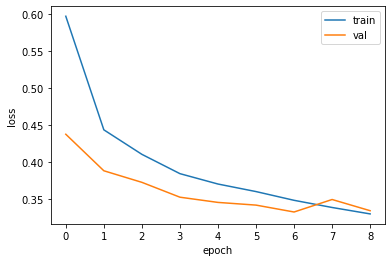

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
# plt.savefig('7_3-07', dpi=300)

plt.show()

In [39]:
model_final.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3327 - accuracy: 0.8790


[0.3326641023159027, 0.8790000081062317]